In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

# Formation energy as  chemical potential vary


 #### Total Energies in eV

In [2]:
E0=-3324932.942491689 # pristine
E1=-3335811.405118595 # addon S
E2=-3314050.981984572 # mono S vacancy
E3=-3303169.531834886 # di S vacancy up&down
E4=-3303169.508929158 # di S vacancy neighboring
E5=-3213688.902122602 # mono Mo vacancy
E_MoS2=-132997.116189474 # primtitive
mu_MoS2=E0/75


### For S8 ring

In [3]:
ES8=-87031.346957    #8 atoms in unitcell
mu_S8=ES8/8
#print(mu_S8)

 ## $$ E^{d}_{f}=E_{defect}(n_{i}+\Delta n_{i})-E_{pristine}(n_{i}) - \sum_{i} \Delta n_{i} \mu_{i} $$
 
## $$  E^{Bulk}_{MoS_{2}}-2\mu_{S8} \leq \mu_{Mo} \leq \mu^{Bulk}_{Mo} $$
## $$ \frac{1}{2}(E_{MoS2}-\mu^{Bulk}_{Mo})\leq \mu_{S} \leq \mu_{S8} $$


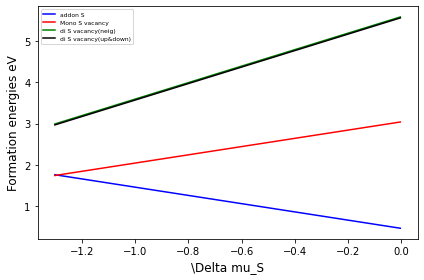

In [4]:
EMo=-222473.348568306  # Total energy in eV
mu_Mobcc=EMo/2
mu_S0_i=0.5*(E_MoS2-mu_Mobcc)
mu_Mo_i=E_MoS2-2*mu_S8
mu_Mo_f=mu_Mobcc
mu_S0_f=mu_S8

mu_S0=arange(mu_S0_i,mu_S0_f,0.05)
mu_Mo0=arange(mu_Mo_i,mu_Mo_f,0.05)
Ef_addS =[] 
Ef_VS = []
Ef_VS2 =[]
Ef_VS22=[]
Ef_Mo=[]

for i in mu_S0:
    Ef_addS.append(E1-E0-i) 
    Ef_VS.append(E2-E0+i)
    Ef_VS2.append(E3-E0+2*i) 
    Ef_VS22.append(E4-E0+2*i)
    
for j in mu_Mo0:
    Ef_Mo.append(E5-E0+j)
   
plt.plot(mu_S0-mu_S0_f,Ef_addS,'b', label='addon S') 
plt.plot(mu_S0-mu_S0_f,Ef_VS,'r', label='Mono S vacancy') 
plt.plot(mu_S0-mu_S0_f,Ef_VS22, 'g', label='di S vacancy(neig)') 
plt.plot(mu_S0-mu_S0_f,Ef_VS2, 'k', label='di S vacancy(up&down)') 
#plt.plot(T, VMo, 'yellow', label='Mono Mo vacany') 
plt.xlabel('\Delta mu_S', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(fontsize=6)
plt.yticks(fontsize=10)
plt.tight_layout()
#

plt.savefig('Efvsmu_S.png',dpi=1200)

plt.show()


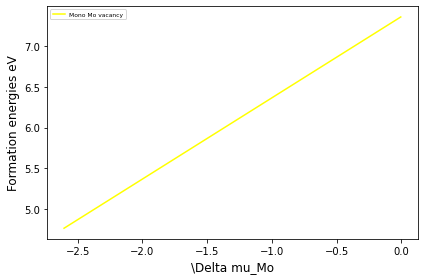

In [5]:
plt.plot(mu_Mo0-mu_Mo_f,Ef_Mo, 'yellow', label='Mono Mo vacancy') 
#plt.plot(T, VMo, 'yellow', label='Mono Mo vacany') 
plt.xlabel('\Delta mu_Mo', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(fontsize=6)
plt.yticks(fontsize=10)
plt.tight_layout()
#
plt.savefig('Efvsmu_Mo.png',dpi=1200)
plt.show()  

# Calculation of $\mu_S$ on full temperature Range

In [6]:
p0=1e+06  # 
k=1.380649e-16
h=6.62607015e-27
hbar=1.054571817e-27
sigma=8
pi=3.14159265359
m=3.1941378e-22
IA=IB=1.314051643394595e-37
IC=2.42660958899724e-37
R=8.31446261815324
convert=29979245800.0*2*pi #cm^-1 to Hz

## $$\mu=   \mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\hbar \omega_{i}}{2}$$

## $$  \mu_{0}=R\ln\frac{Z^{0}}{V} \frac{kT}{p_{0}} = -kT\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]- kT \ln(\frac{\pi^{\frac{1}{2}}}{\sigma})+ \\ 
    -kT \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})+kT \sum^{3N-6}_{i} \ln(1-exp(-\beta h \omega_{i})) $$

## $$ A=\ln( \frac{Z^{0}_{trans} kT}{V})=\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]= \ln [(2 \pi m )^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{h^{3} p_{0}}]$$

In [7]:
A=[]
T=800
A = np.log((((2*pi*m)**(3/2))*((k*T)**(5/2)))/(p0*(h**3)))
#print('A= ', A)


##  $$ B= \ln Z^{0}_{rot}=\ln(\frac{\pi^{\frac{1}{2}}}{\sigma})+ \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})$$

In [8]:
B=[]
T=800
I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*k*T)/(h**2))**(3/2))*I)
#print('B= ', B)

## $$ C=\ln Z^{0}_{vib}= -\sum^{3N-6}_{i} \ln(1-exp(-\frac{ \hbar \omega_{i}}{kT}))$$

In [9]:
C=[]
w=[2.10968990e-01, 7.42646474e+01, 7.43325628e+01, 1.36225482e+02,
 1.36290076e+02, 1.85771263e+02, 1.85786796e+02, 2.12035325e+02,
 2.28606326e+02, 2.45210844e+02, 2.45241312e+02, 3.56870108e+02,
 3.90002968e+02, 3.90080384e+02, 4.51735833e+02, 4.51793806e+02,
 4.61001272e+02, 4.61044236e+02, 4.70393264e+02]
w=np.array(w)*convert
T=800
temp=-numpy.array([(np.log(1-math.exp(-(hbar*i)/(k*T)))) for i in w])
C=np.sum(temp)
   
#print('C= ', C)

## $$\sum_{i}\frac{\hbar \omega_{i}}{2}$$

In [10]:
D=[]

temp=numpy.array([(hbar*i)/(2) for i in w])
D=np.sum(temp)
#print('D= ', D)

In [11]:
k=8.617333262145e-05 ###########
T=800
mu_0=-k*T*(A+B+C)


## $$ \mu=\mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\hbar \omega_{i}}{2}$$

In [12]:
E_DFT=-87031.346957 #ev
#p=1914.57 # 1.89e-3 atm 
#for p in arange(p0/1e+12,p0):
#    print(k*T*np.log(p/p0))

<ipython-input-13-62f4741515c2>:5: RuntimeWarning: divide by zero encountered in log
  mu_S8=np.append(mu_0 + k*T*np.log(p/p0)+D + E_DFT,mu_S8)


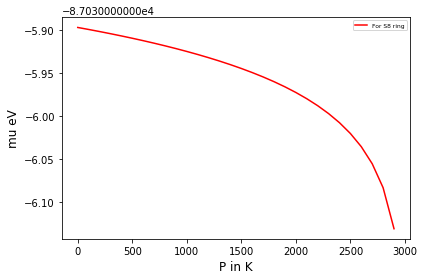

In [13]:
T=800
mu_S8=[]
for p in arange(0,3010,100):    
   
     mu_S8=np.append(mu_0 + k*T*np.log(p/p0)+D + E_DFT,mu_S8)
p=arange(0,3010,100)  #      0.00096784110535406 
plt.plot(p,mu_S8, 'red', label='For S8 ring')
plt.xlabel('P in K', fontsize=12)
plt.ylabel('mu eV', fontsize=12)
plt.legend(fontsize=6)
plt.yticks(fontsize=10)
plt.tight_layout()

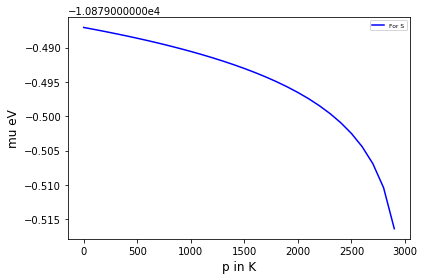

In [14]:
mu_S=mu_S8/8
plt.plot(p,mu_S, 'blue', label='For S')
plt.xlabel('p in K', fontsize=12)
plt.ylabel('mu eV', fontsize=12)
plt.legend(fontsize=6)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('mu_SvsT.png',dpi=1200)

# Calculation of $\mu_{Mo}$ on full temperature Range

#### For Mo BCC bulk
$$ \mu_{Mo}^{BCC}=\frac{1}{2}(E_{DFT}+ PV) + \frac{1}{2} F_{phon}(V,T) $$

-111236.674284153
[-111236.95721926 -111236.95721926 -111236.95721926 ... -111236.95722019
 -111236.95722019 -111236.95722019]


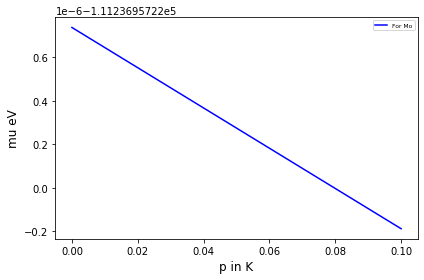

In [15]:
EMo=-222473.348568306  # Total energy in eV
mu_Mobcc=EMo/2
print(mu_Mobcc)
d6=pd.read_csv('F_Mo', sep='\s+',header=0)
Fphon=d6['x']*0.01 # kj/mol to eV
Fphon=Fphon[71] # 800 k only

V= 0.292849E+02 # volume of unitcell A^3
#p= 1e-06 #8.4473718e-12 # atm
mu_Mo=[]
T=800

for p in arange(1.12e-15,1e-1,1e-6):
    mu_Mo=np.append(((1/2)*(EMo+(p*V*6.3242093e-07)+ Fphon)), mu_Mo) # to eV
print(mu_Mo)    
p=arange(1.12e-15,1e-1,1e-6) 
plt.plot(p, mu_Mo, 'blue', label='For Mo')
plt.xlabel('p in K', fontsize=12)
plt.ylabel('mu eV', fontsize=12)
plt.legend(fontsize=6)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('mu_MovsT.png',dpi=1200)

#### Read the frequencies